Data Cleaning and Dataset Understanding

This notebook focuses on loading the Life Expectancy dataset and performing initial data inspection and cleaning. The goal is to understand the structure of the data, identify missing values, and prepare the dataset for further exploratory analysis.


In [3]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)


In [4]:
df=pd.read_csv('D:\VANSH\Life-Expectancy-Analysis-main\data\Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.shape

(2938, 22)

In [6]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

The dataset contains records for multiple countries over a period of several years. Each row represents a country-year observation, and the columns include health indicators, economic factors, social variables, and the target variable (life expectancy).


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Missing Value Treatment

Several numerical columns contain missing values. Since the dataset is sufficiently large and the missing values are relatively small in proportion, mean imputation is applied to numerical columns to retain all records.


In [ ]:
from sklearn.impute import SimpleImputer
num_cols=df.select_dtypes(include=['float64','int64']).columns
imputer=SimpleImputer(strategy='mean')
df[num_cols]=imputer.fit_transform(df[num_cols])

In [11]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [13]:
df.duplicated().sum()
#if zero well and good if not then we use df.drop_duplicates()

np.int64(0)

In [14]:
df.to_csv('../data/life_expectancy_cleaned.csv', index=False)


Outlier Detection and Treatment

Outliers are extreme values that deviate significantly from other observations and can negatively impact statistical analysis and predictive models. In this project, the Interquartile Range (IQR) method is used to detect and treat outliers in numerical columns.


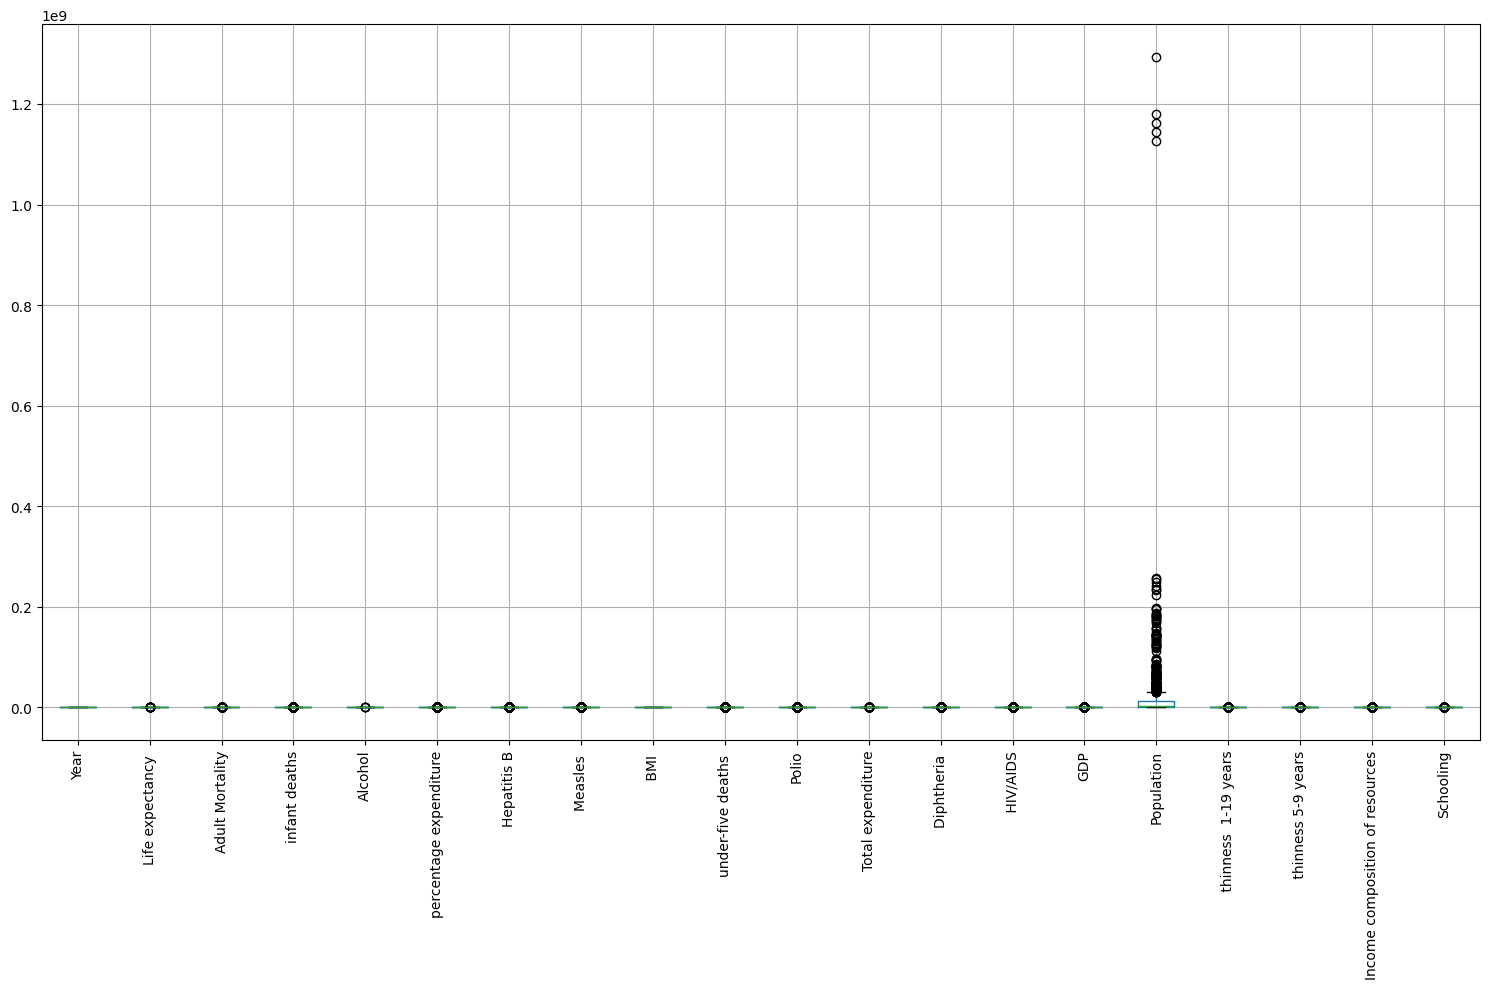

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
df[num_cols].boxplot(rot=90)
plt.tight_layout()
plt.show()


In [16]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[col] = np.where(
        (df[col] < lower_bound) | (df[col] > upper_bound),
        df[col].mean(),
        df[col]
    )


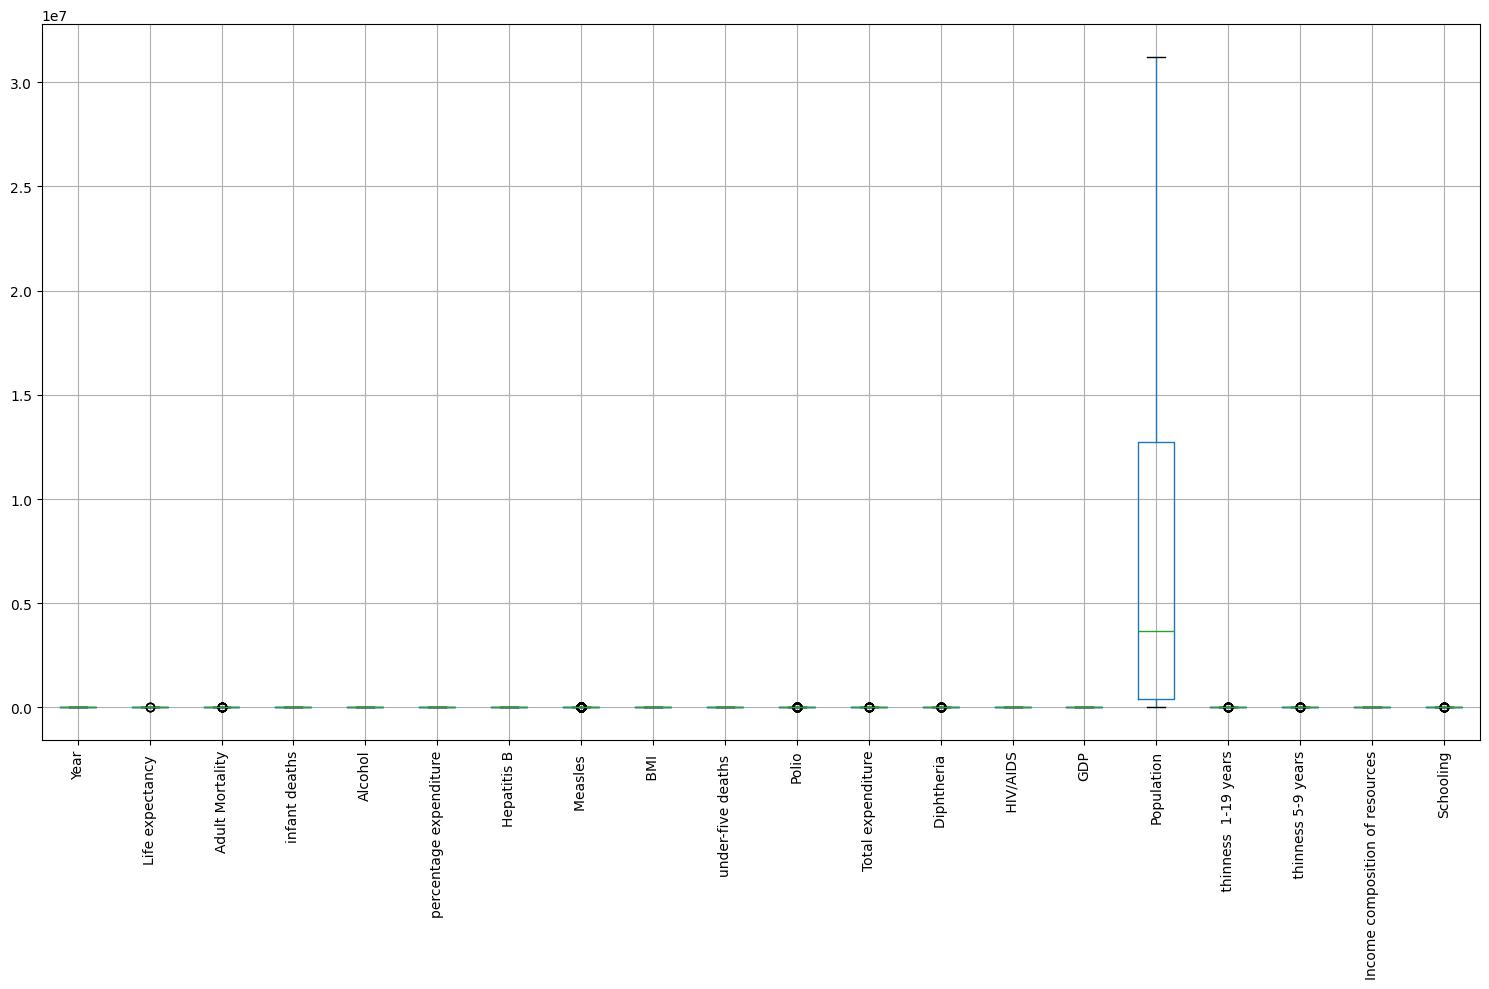

In [17]:
plt.figure(figsize=(15, 10))
df[num_cols].boxplot(rot=90)
plt.tight_layout()
plt.show()


In [18]:
df.to_csv('../data/life_expectancy_cleaned.csv', index=False)
